In [1]:
import keras
import numpy as np
import keras.backend as K
from keras.datasets import mnist
from keras.utils import np_utils
K.set_learning_phase(False)
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

Using TensorFlow backend.


In [2]:
model = keras.models.load_model('example_keras_mnist_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                247872    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

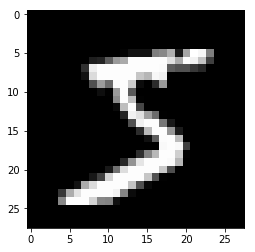

In [3]:
dataset = mnist.load_data()
train_data = dataset[0][0] / 255
train_data = train_data[..., np.newaxis].astype('float32')
train_labels = np_utils.to_categorical(dataset[0][1]).astype('float32')
test_data = dataset[1][0] / 255
test_data = test_data[..., np.newaxis].astype('float32')
test_labels = np_utils.to_categorical(dataset[1][1]).astype('float32')
plt.imshow(train_data[0, ..., 0])

Keras model are serialzed in a JSON format.

In [4]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 28, 28, 1),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_1',
   'padding': 'valid',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'MaxPooling2D',
  'config': {'data_format': 'channels_last',
   'name': 'max_pooling2d_1',
   'padding': 'valid',
   'pool_size': (2, 2),
   'strides': (2, 2),
   'trainable': True}},
 {'class_name': 'Conv2D',
  'config': {'activation': 'relu',
   'activity_r

### Getting the weights
Weights can be retrieved either directly from the model or from each individual layer.

In [5]:
# Weights and biases of the entire model.
model.get_weights()

[array([[[[-0.33856323,  0.20390955, -0.11109605,  0.27959093,  0.00380358,
            0.06809236,  0.13476925, -0.06905884, -0.00914569,  0.01789398,
           -0.15531571,  0.1061649 , -0.16948256,  0.07929865,  0.16483295,
           -0.07207379,  0.24873769, -0.19941764,  0.16662872,  0.19174086,
           -0.01943381,  0.0066115 ,  0.0134623 ,  0.04628464,  0.00221355,
           -0.23785631,  0.05527339, -0.32550618, -0.12803005,  0.00084405,
           -0.21533267, -0.18520311]],
 
         [[-0.05132618,  0.11048742, -0.01836612, -0.12476675, -0.18518658,
            0.03234763,  0.19836517, -0.11385031, -0.22344072,  0.17603368,
            0.14256321,  0.085033  ,  0.00895712,  0.06350163,  0.1005916 ,
            0.13216837, -0.05474935, -0.13029362, -0.05059361,  0.10186421,
            0.13374192, -0.11962113, -0.10992999,  0.08803006, -0.03906573,
           -0.3092995 , -0.01672952, -0.23022896, -0.30201221,  0.10596731,
           -0.27116138, -0.35430175]],
 
      

In [6]:
# Weights and bias for a single layer.
conv_layer = model.get_layer('conv2d_1')
conv_layer.get_weights()

[array([[[[-0.33856323,  0.20390955, -0.11109605,  0.27959093,  0.00380358,
            0.06809236,  0.13476925, -0.06905884, -0.00914569,  0.01789398,
           -0.15531571,  0.1061649 , -0.16948256,  0.07929865,  0.16483295,
           -0.07207379,  0.24873769, -0.19941764,  0.16662872,  0.19174086,
           -0.01943381,  0.0066115 ,  0.0134623 ,  0.04628464,  0.00221355,
           -0.23785631,  0.05527339, -0.32550618, -0.12803005,  0.00084405,
           -0.21533267, -0.18520311]],
 
         [[-0.05132618,  0.11048742, -0.01836612, -0.12476675, -0.18518658,
            0.03234763,  0.19836517, -0.11385031, -0.22344072,  0.17603368,
            0.14256321,  0.085033  ,  0.00895712,  0.06350163,  0.1005916 ,
            0.13216837, -0.05474935, -0.13029362, -0.05059361,  0.10186421,
            0.13374192, -0.11962113, -0.10992999,  0.08803006, -0.03906573,
           -0.3092995 , -0.01672952, -0.23022896, -0.30201221,  0.10596731,
           -0.27116138, -0.35430175]],
 
      

Moreover the respespective backend variables that store the weights can be retrieved.

In [7]:
conv_layer.weights

[<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 32) dtype=float32_ref>,
 <tf.Variable 'conv2d_1/bias:0' shape=(32,) dtype=float32_ref>]

### Getting the activations and net inputs
Intermediary computation results, i.e. results are not part of the prediction cannot be directly retrieved from Keras. It possible to build a new model for which the intermediary result is the prediction, but this approach makes computation rather inefficient when several intermediary results are to be retrieved. Instead it is better to reach directly into the backend for this purpose.

Activations are still fairly straight forward as the relevant tensors can be retrieved as output of the layer. 

In [8]:
# Getting the Tensorflow session and the input tensor.
sess = keras.backend.get_session()
network_input_tensor = model.layers[0].input
network_input_tensor

<tf.Tensor 'conv2d_1_input:0' shape=(?, 28, 28, 1) dtype=float32>

In [10]:
# Getting the tensor that holds the actiations as the output of a layer.
activation_tensor = conv_layer.output
activation_tensor

<tf.Tensor 'conv2d_1/Relu:0' shape=(?, 26, 26, 32) dtype=float32>

In [16]:
activations = sess.run(activation_tensor, feed_dict={network_input_tensor: test_data[0:1]})
activations.shape

(1, 26, 26, 32)

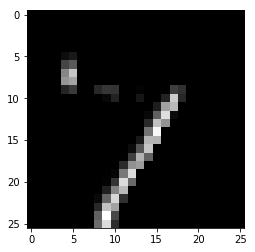

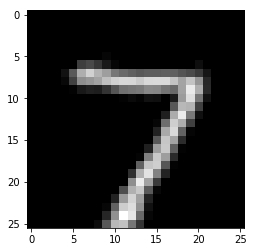

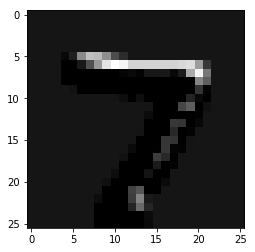

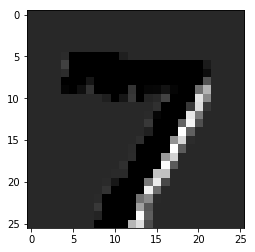

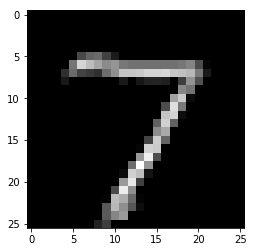

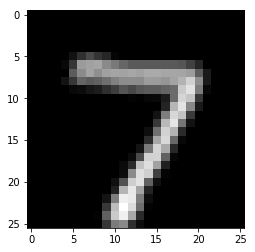

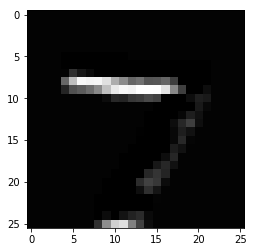

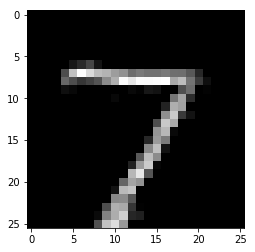

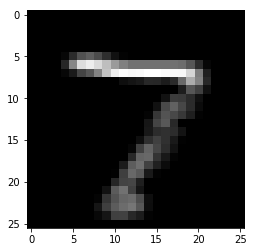

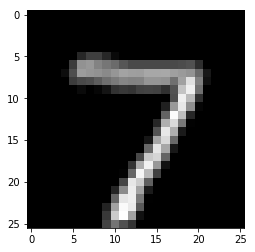

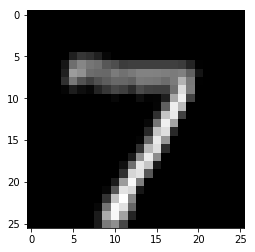

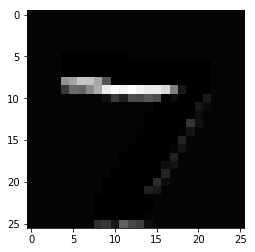

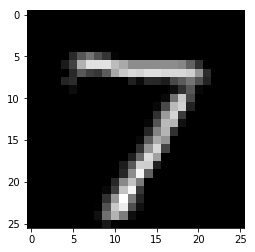

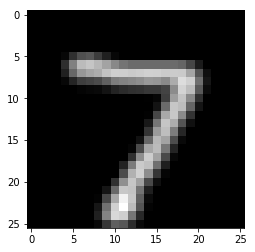

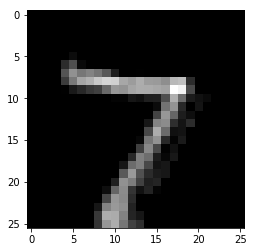

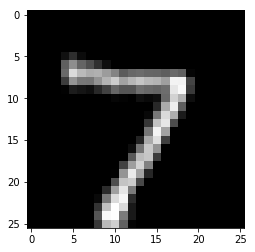

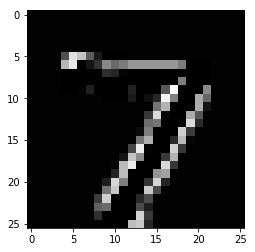

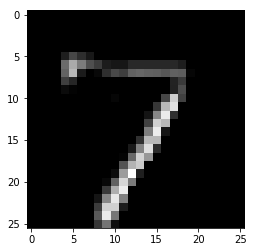

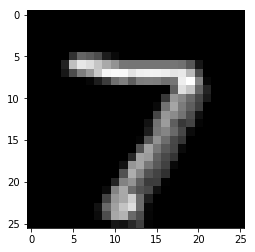

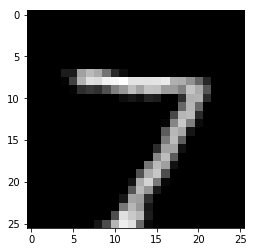

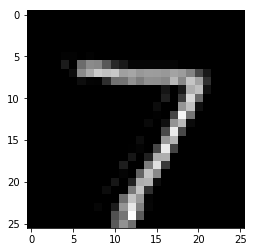

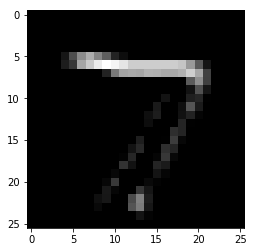

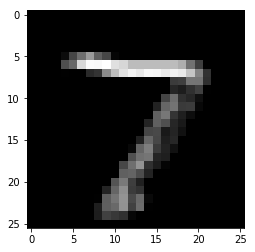

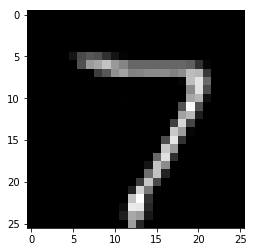

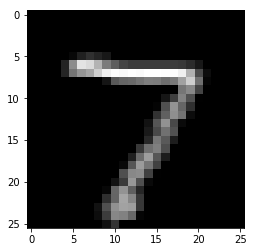

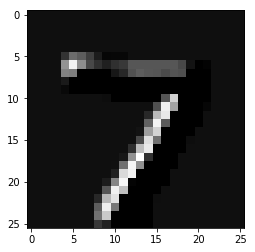

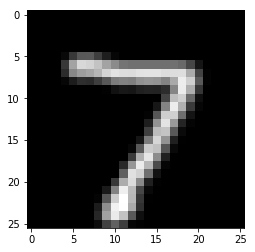

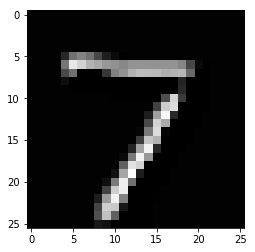

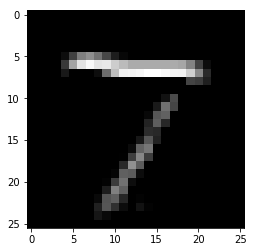

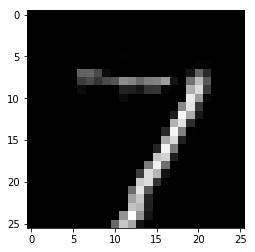

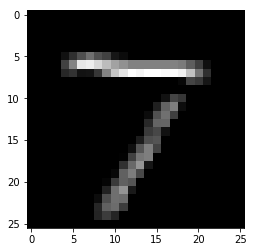

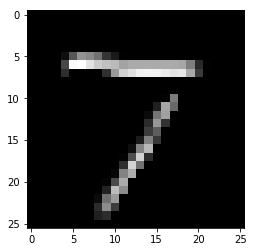

In [19]:
for i in range(32):
    plt.imshow(activations[0, ..., i])
    plt.show()

Net input is a little more complicated as we have to reach heuristically into the TensorFlow graph to find the relevant tensors. However, it can be safely assumed most of the time that the net input tensor in input to the activaton op.

In [28]:
net_input_tensor = activation_tensor.op.inputs[0]
net_input_tensor

<tf.Tensor 'conv2d_1/BiasAdd:0' shape=(?, 26, 26, 32) dtype=float32>

In [29]:
net_inputs = sess.run(net_input_tensor, feed_dict={network_input_tensor: test_data[0:1]})
net_inputs.shape

(1, 26, 26, 32)

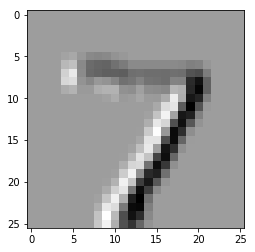

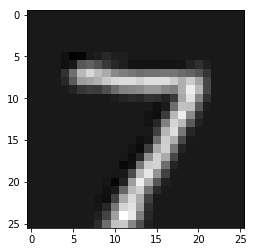

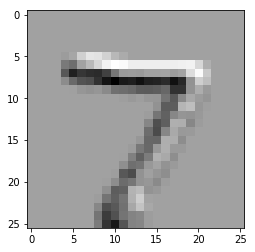

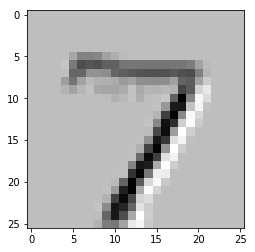

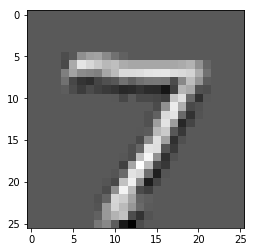

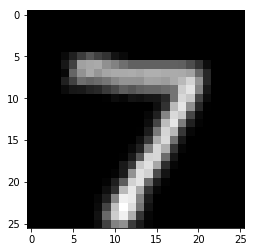

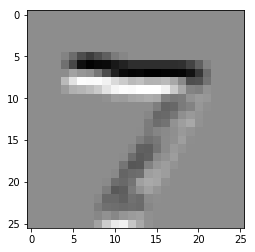

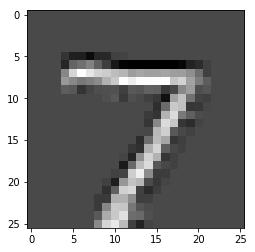

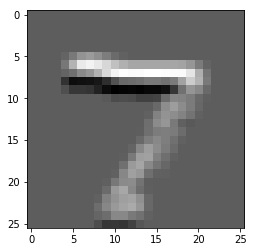

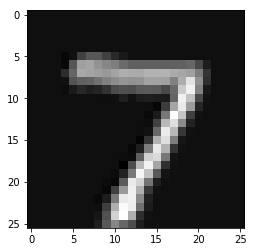

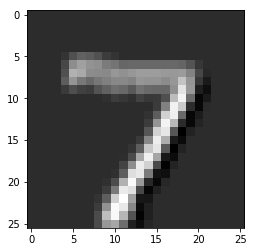

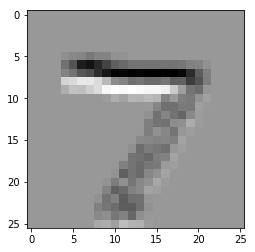

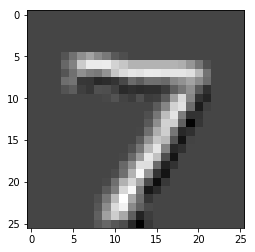

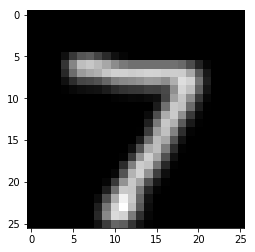

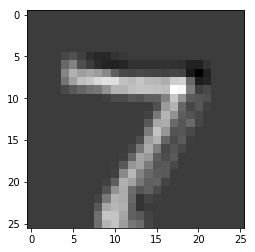

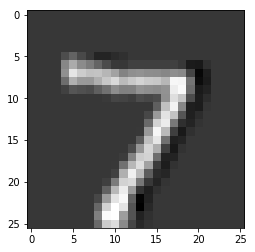

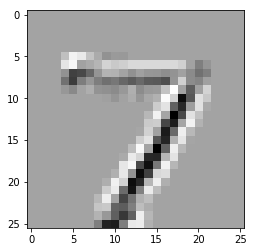

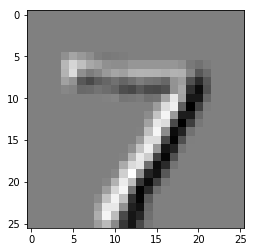

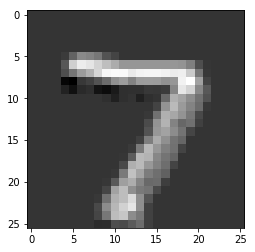

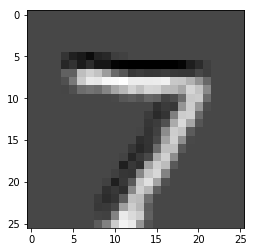

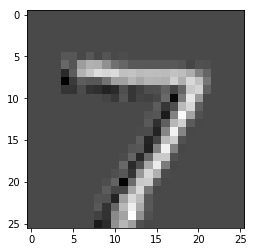

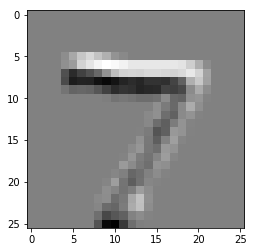

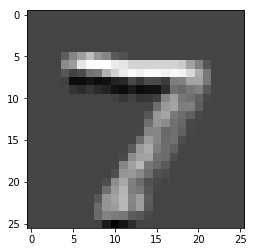

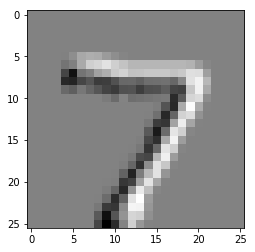

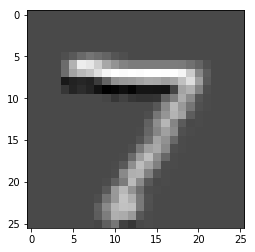

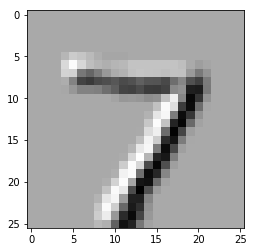

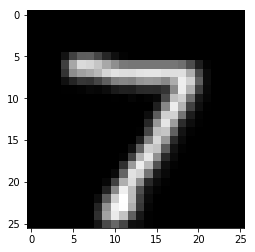

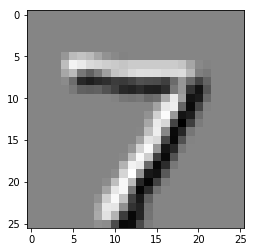

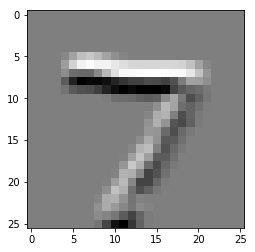

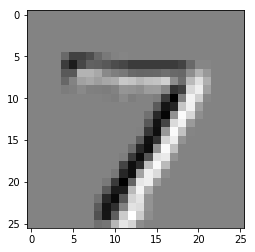

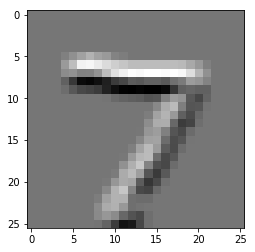

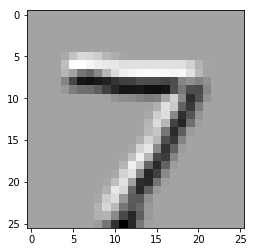

In [30]:
for i in range(32):
    plt.imshow(net_inputs[0, ..., i])
    plt.show()

### Getting layer properties
Each Keras layer object provides the relevant properties as attributes 

In [13]:
conv_layer = model.get_layer('conv2d_1')
conv_layer

In [14]:
conv_layer.input_shape

(None, 28, 28, 1)

In [16]:
conv_layer.output_shape

(None, 26, 26, 32)

In [17]:
conv_layer.kernel_size

(3, 3)

In [18]:
conv_layer.strides

(1, 1)

In [19]:
max_pool_layer = model.get_layer('max_pooling2d_1')
max_pool_layer

In [20]:
max_pool_layer.strides

(2, 2)

In [21]:
max_pool_layer.pool_size

(2, 2)

Layer type information can only be retrieved through the class name

In [24]:
conv_layer.__class__.__name__

'Conv2D'